In [128]:
!pip install ucimlrepo

In [129]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, losses, datasets
import matplotlib.pyplot as plt
import seaborn as sns

from typing import Dict, List, Tuple


sns.set_theme()


In [130]:

def plot_history(
                history: Dict[str, List[float]],
                title: str = "",
                metric_name: str = 'loss',
                ylim: Tuple[float, float] = None
    ):

    train_values = history[metric_name]
    plt.plot(train_values, label=f'Train {metric_name}')
    try:
        val_values = history['val_' + metric_name]
        plt.plot(val_values, label=f'Validation {metric_name}')
    except KeyError:
        val_values = []
    plt.title(title)
    all_values = train_values + val_values
    ylim = ylim or (0.9 * min(all_values), 1.1 * max(all_values))
    plt.ylim(ylim)
    plt.ylabel(metric_name.capitalize())
    plt.xlabel("Epoch")
    plt.legend(loc='best')
    plt.show()

# Задание 1

In [131]:
breast_cancer = fetch_ucirepo(id=17)

In [132]:
X = breast_cancer.data.features
y = breast_cancer.data.targets

In [133]:
y = y["Diagnosis"]

In [134]:
X.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [135]:
X.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')

In [136]:
X.isna().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

In [137]:
y = pd.factorize(y)[0]

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


## First model (4 layers, sigmoid)

In [139]:
first_model = tf.keras.Sequential(
    layers=[
        layers.Dense(16, activation='sigmoid', input_dim=X_train.shape[1]),
        layers.Dense(8, activation='sigmoid'),
        layers.Dense(6, activation='sigmoid'),
        layers.Dense(1, activation='sigmoid')
    ],
    name="breast-cancer-first-model",
)
first_model.summary()

Model: "breast-cancer-first-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 16)                496       
                                                                 
 dense_24 (Dense)            (None, 8)                 136       
                                                                 
 dense_25 (Dense)            (None, 6)                 54        
                                                                 
 dense_26 (Dense)            (None, 1)                 7         
                                                                 
Total params: 693 (2.71 KB)
Trainable params: 693 (2.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [140]:
first_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [141]:
first_model_history = first_model.fit(
    X_train, y_train,
    epochs=40,
    batch_size=20,
    validation_data=(X_test, y_test)
)

Epoch 1/40
20/20 [==============================] - 3s 30ms/step - loss: 0.7665 - accuracy: 0.3806 - val_loss: 0.7592 - val_accuracy: 0.3564
Epoch 2/40
20/20 [==============================] - 0s 12ms/step - loss: 0.7389 - accuracy: 0.3806 - val_loss: 0.7337 - val_accuracy: 0.3564
Epoch 3/40
20/20 [==============================] - 0s 16ms/step - loss: 0.7192 - accuracy: 0.3806 - val_loss: 0.7128 - val_accuracy: 0.3564
Epoch 4/40
20/20 [==============================] - 0s 13ms/step - loss: 0.7050 - accuracy: 0.3806 - val_loss: 0.7006 - val_accuracy: 0.3564
Epoch 5/40
20/20 [==============================] - 1s 26ms/step - loss: 0.6958 - accuracy: 0.4357 - val_loss: 0.6909 - val_accuracy: 0.6436
Epoch 6/40
20/20 [==============================] - 0s 8ms/step - loss: 0.6873 - accuracy: 0.6194 - val_loss: 0.6805 - val_accuracy: 0.6436
Epoch 7/40
20/20 [==============================] - 0s 11ms/step - loss: 0.6799 - accuracy: 0.6194 - val_loss: 0.6723 - val_accuracy: 0.6436
Epoch 8/40
20/

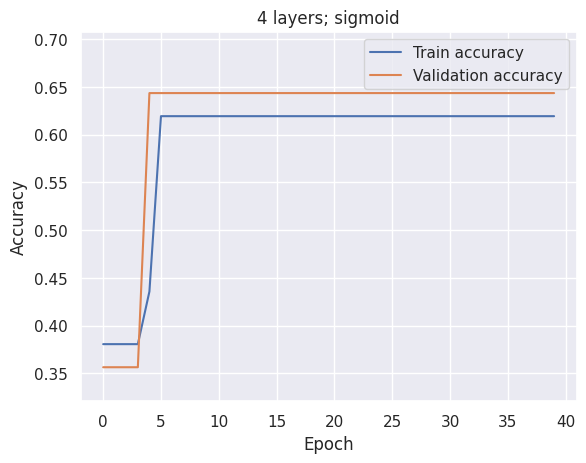

In [142]:
plot_history(first_model_history.history, "4 layers; sigmoid", "accuracy")


## Second model (2 layers, relu + sigmoid)

In [143]:
second_model = tf.keras.Sequential(
    layers=[
        layers.Dense(16, activation='relu', input_dim=X_train.shape[1]),
        layers.Dense(1, activation='sigmoid')
    ],
    name="breast-cancer-second-model",
)
second_model.summary()

Model: "breast-cancer-second-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 16)                496       
                                                                 
 dense_28 (Dense)            (None, 1)                 17        
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [144]:
second_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [145]:
second_model_history = second_model.fit(
    X_train, y_train,
    epochs=40,
    batch_size=20,
    validation_data=(X_test, y_test)
)

Epoch 1/40
20/20 [==============================] - 3s 31ms/step - loss: 23.6595 - accuracy: 0.6640 - val_loss: 0.6300 - val_accuracy: 0.7819
Epoch 2/40
20/20 [==============================] - 0s 20ms/step - loss: 1.4154 - accuracy: 0.7218 - val_loss: 0.3686 - val_accuracy: 0.9149
Epoch 3/40
20/20 [==============================] - 0s 11ms/step - loss: 0.8044 - accuracy: 0.8451 - val_loss: 0.3816 - val_accuracy: 0.8723
Epoch 4/40
20/20 [==============================] - 0s 12ms/step - loss: 0.5973 - accuracy: 0.8635 - val_loss: 0.3027 - val_accuracy: 0.8830
Epoch 5/40
20/20 [==============================] - 0s 21ms/step - loss: 0.4523 - accuracy: 0.8714 - val_loss: 0.1951 - val_accuracy: 0.9309
Epoch 6/40
20/20 [==============================] - 0s 14ms/step - loss: 0.3833 - accuracy: 0.8766 - val_loss: 0.1708 - val_accuracy: 0.9309
Epoch 7/40
20/20 [==============================] - 0s 10ms/step - loss: 0.5297 - accuracy: 0.8635 - val_loss: 0.2279 - val_accuracy: 0.9255
Epoch 8/40
2

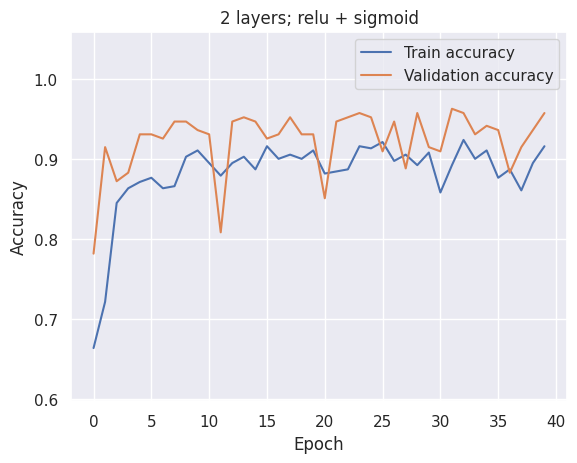

In [146]:
plot_history(second_model_history.history, "2 layers; relu + sigmoid", "accuracy")


## Third model (1 layer; sigmoid)

In [147]:
third_model = tf.keras.Sequential(
    layers=[
        layers.Dense(1, activation='sigmoid', input_dim=X_train.shape[1]),
    ],
    name="breast-cancer-third-model",
)
third_model.summary()

Model: "breast-cancer-third-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 1)                 31        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [148]:
third_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [149]:
third_model_history = third_model.fit(
    X_train, y_train,
    epochs=60,
    batch_size=20,
    validation_data=(X_test, y_test)
)

Epoch 1/60
20/20 [==============================] - 1s 13ms/step - loss: 134.1625 - accuracy: 0.6194 - val_loss: 115.4633 - val_accuracy: 0.6436
Epoch 2/60
20/20 [==============================] - 0s 5ms/step - loss: 113.6114 - accuracy: 0.6194 - val_loss: 96.4588 - val_accuracy: 0.6436
Epoch 3/60
20/20 [==============================] - 0s 4ms/step - loss: 93.3493 - accuracy: 0.6194 - val_loss: 77.3862 - val_accuracy: 0.6436
Epoch 4/60
20/20 [==============================] - 0s 4ms/step - loss: 72.4316 - accuracy: 0.6194 - val_loss: 57.0769 - val_accuracy: 0.6436
Epoch 5/60
20/20 [==============================] - 0s 4ms/step - loss: 51.1724 - accuracy: 0.6194 - val_loss: 37.2483 - val_accuracy: 0.6436
Epoch 6/60
20/20 [==============================] - 0s 4ms/step - loss: 30.8454 - accuracy: 0.6194 - val_loss: 19.3291 - val_accuracy: 0.6436
Epoch 7/60
20/20 [==============================] - 0s 4ms/step - loss: 11.9767 - accuracy: 0.5197 - val_loss: 4.5852 - val_accuracy: 0.2021
Epo

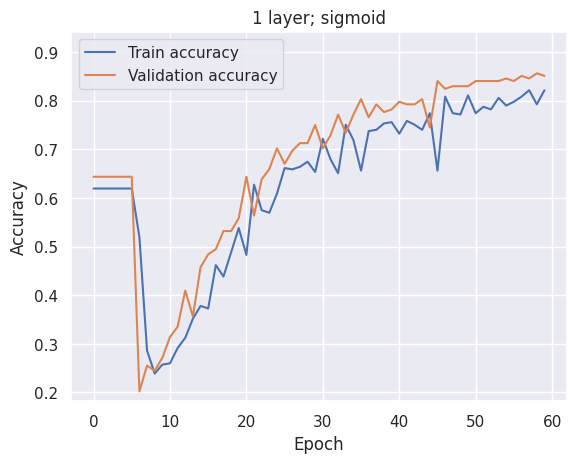

In [150]:
plot_history(third_model_history.history, "1 layer; sigmoid", "accuracy")


# Задание 2

In [151]:
heart_failure = fetch_ucirepo(id=519)

In [152]:
X = heart_failure.data.features
y = heart_failure.data.targets

In [153]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [154]:
y = y["death_event"]

In [155]:
y = pd.factorize(y)[0]

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


## First model (4 layers; relu + sigmoid)

In [157]:
first_model = tf.keras.Sequential(
    layers=[
        layers.Dense(12, activation='relu', input_dim=X_train.shape[1]),
        layers.Dense(8, activation='relu'),
        layers.Dense(4, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ],
    name="Heart-failure-first-model",
)
first_model.summary()

Model: "Heart-failure-first-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 12)                156       
                                                                 
 dense_31 (Dense)            (None, 8)                 104       
                                                                 
 dense_32 (Dense)            (None, 4)                 36        
                                                                 
 dense_33 (Dense)            (None, 1)                 5         
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [158]:
first_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [159]:
first_model_history = first_model.fit(
    X_train, y_train,
    epochs=40,
    batch_size=20,
    validation_data=(X_test, y_test)
)

Epoch 1/40
10/10 [==============================] - 1s 28ms/step - loss: 668.7420 - accuracy: 0.7300 - val_loss: 474.4543 - val_accuracy: 0.5758
Epoch 2/40
10/10 [==============================] - 0s 7ms/step - loss: 187.1459 - accuracy: 0.4900 - val_loss: 148.1537 - val_accuracy: 0.4242
Epoch 3/40
10/10 [==============================] - 0s 7ms/step - loss: 91.2804 - accuracy: 0.5950 - val_loss: 187.4800 - val_accuracy: 0.5758
Epoch 4/40
10/10 [==============================] - 0s 8ms/step - loss: 77.8891 - accuracy: 0.7300 - val_loss: 4.6184 - val_accuracy: 0.5657
Epoch 5/40
10/10 [==============================] - 0s 9ms/step - loss: 39.7312 - accuracy: 0.4900 - val_loss: 81.3059 - val_accuracy: 0.5758
Epoch 6/40
10/10 [==============================] - 0s 8ms/step - loss: 35.4896 - accuracy: 0.7100 - val_loss: 32.7565 - val_accuracy: 0.4242
Epoch 7/40
10/10 [==============================] - 0s 8ms/step - loss: 22.8708 - accuracy: 0.6600 - val_loss: 37.4587 - val_accuracy: 0.5859
E

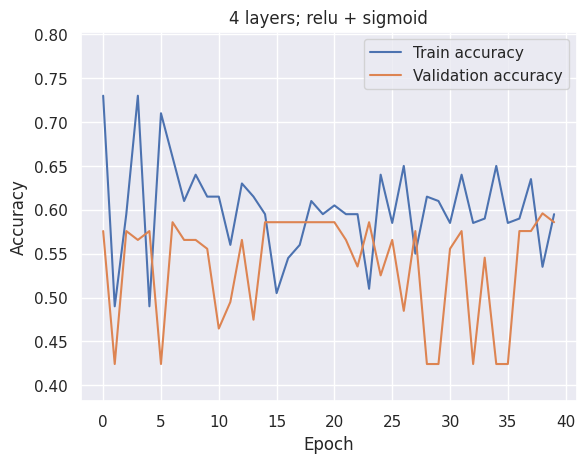

In [160]:
plot_history(first_model_history.history, "4 layers; relu + sigmoid", "accuracy")


## Second model (4 layers + BN; relu + sigmoid)

In [161]:
second_model = tf.keras.Sequential(
    layers=[
        layers.Dense(12, activation='relu', input_dim=X_train.shape[1]),
        layers.BatchNormalization(),
        layers.Dense(8, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(4, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(1, activation='sigmoid')
    ],
    name="Heart-failure-second-model",
)
second_model.summary()

Model: "Heart-failure-second-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 12)                156       
                                                                 
 batch_normalization_3 (Bat  (None, 12)                48        
 chNormalization)                                                
                                                                 
 dense_35 (Dense)            (None, 8)                 104       
                                                                 
 batch_normalization_4 (Bat  (None, 8)                 32        
 chNormalization)                                                
                                                                 
 dense_36 (Dense)            (None, 4)                 36        
                                                                 
 batch_normalization_5 (Bat  (None, 4)  

In [162]:
second_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [163]:
second_model_history = second_model.fit(
    X_train, y_train,
    epochs=40,
    batch_size=20,
    validation_data=(X_test, y_test)
)

Epoch 1/40
10/10 [==============================] - 2s 37ms/step - loss: 0.7894 - accuracy: 0.4500 - val_loss: 6.8059 - val_accuracy: 0.4343
Epoch 2/40
10/10 [==============================] - 0s 7ms/step - loss: 0.7696 - accuracy: 0.4550 - val_loss: 4.3005 - val_accuracy: 0.4343
Epoch 3/40
10/10 [==============================] - 0s 7ms/step - loss: 0.7629 - accuracy: 0.4900 - val_loss: 3.1292 - val_accuracy: 0.4343
Epoch 4/40
10/10 [==============================] - 0s 8ms/step - loss: 0.7562 - accuracy: 0.5050 - val_loss: 2.4491 - val_accuracy: 0.4242
Epoch 5/40
10/10 [==============================] - 0s 7ms/step - loss: 0.7305 - accuracy: 0.4950 - val_loss: 1.9933 - val_accuracy: 0.4141
Epoch 6/40
10/10 [==============================] - 0s 9ms/step - loss: 0.7246 - accuracy: 0.5550 - val_loss: 1.6842 - val_accuracy: 0.4040
Epoch 7/40
10/10 [==============================] - 0s 8ms/step - loss: 0.7142 - accuracy: 0.5600 - val_loss: 1.4602 - val_accuracy: 0.3838
Epoch 8/40
10/10 [=

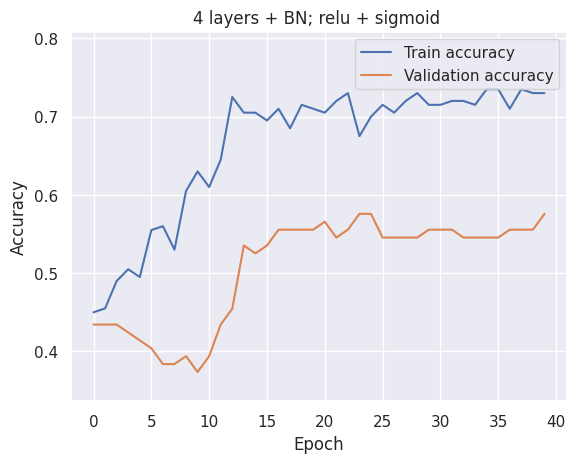

In [164]:
plot_history(second_model_history.history, "4 layers + BN; relu + sigmoid ", "accuracy")

## Third model (6 layers + BN; sigmoid)

In [165]:
third_model = tf.keras.Sequential(
    layers=[
        layers.Dense(32, activation='sigmoid', input_dim=X_train.shape[1]),
        layers.BatchNormalization(),
        layers.Dense(16, activation='sigmoid'),
        layers.BatchNormalization(),
        layers.Dense(8, activation='sigmoid'),
        layers.BatchNormalization(),
        layers.Dense(4, activation='sigmoid'),
        layers.BatchNormalization(),
        layers.Dense(2, activation='sigmoid'),
        layers.BatchNormalization(),
        layers.Dense(1, activation='sigmoid') ,
    ],
    name="Heart-failure-third-model",
)
third_model.summary()

Model: "Heart-failure-third-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 32)                416       
                                                                 
 batch_normalization_6 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_39 (Dense)            (None, 16)                528       
                                                                 
 batch_normalization_7 (Bat  (None, 16)                64        
 chNormalization)                                                
                                                                 
 dense_40 (Dense)            (None, 8)                 136       
                                                                 
 batch_normalization_8 (Bat  (None, 8)   

In [166]:
third_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [167]:
third_model_history = third_model.fit(
    X_train, y_train,
    epochs=80,
    batch_size=20,
    validation_data=(X_test, y_test)
)

Epoch 1/80
10/10 [==============================] - 4s 120ms/step - loss: 0.6916 - accuracy: 0.6800 - val_loss: 0.6932 - val_accuracy: 0.4242
Epoch 2/80
10/10 [==============================] - 0s 9ms/step - loss: 0.6883 - accuracy: 0.7300 - val_loss: 0.6930 - val_accuracy: 0.5758
Epoch 3/80
10/10 [==============================] - 0s 9ms/step - loss: 0.6850 - accuracy: 0.7300 - val_loss: 0.6927 - val_accuracy: 0.5758
Epoch 4/80
10/10 [==============================] - 0s 10ms/step - loss: 0.6817 - accuracy: 0.7300 - val_loss: 0.6924 - val_accuracy: 0.5758
Epoch 5/80
10/10 [==============================] - 0s 10ms/step - loss: 0.6785 - accuracy: 0.7300 - val_loss: 0.6921 - val_accuracy: 0.5758
Epoch 6/80
10/10 [==============================] - 0s 9ms/step - loss: 0.6749 - accuracy: 0.7300 - val_loss: 0.6919 - val_accuracy: 0.5758
Epoch 7/80
10/10 [==============================] - 0s 10ms/step - loss: 0.6714 - accuracy: 0.7300 - val_loss: 0.6916 - val_accuracy: 0.5758
Epoch 8/80
10/1

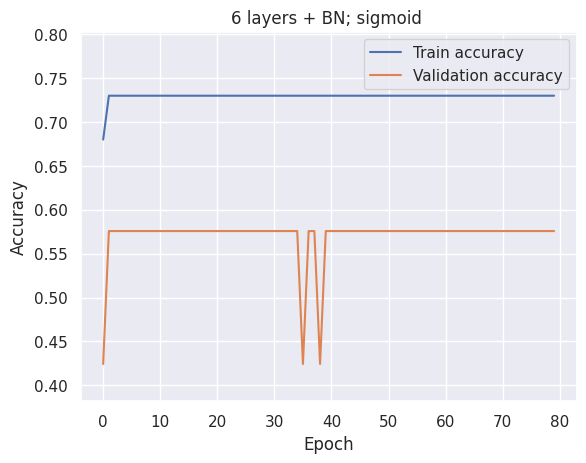

In [168]:
plot_history(third_model_history.history, "6 layers + BN; sigmoid ", "accuracy")

# Задание 3

In [169]:
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## First model (3 layers; relu + softmax)

In [170]:
first_model = tf.keras.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Rescaling(1 / 255),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10),
    layers.Softmax()
    ],
    name="mnist-first-model",
)
first_model.summary()

Model: "mnist-first-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 rescaling (Rescaling)       (None, 784)               0         
                                                                 
 dense_44 (Dense)            (None, 512)               401920    
                                                                 
 dense_45 (Dense)            (None, 128)               65664     
                                                                 
 dense_46 (Dense)            (None, 10)                1290      
                                                                 
 softmax (Softmax)           (None, 10)                0         
                                                                 
Total params: 468874 (1.79 MB)
Trainable params: 

In [171]:
first_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [172]:
%%time
first_model_history = first_model.fit(
    train_x, train_y,
    epochs=40,
    batch_size=100,
    validation_data=(test_x, test_y)
)


Epoch 1/40
600/600 [==============================] - 13s 20ms/step - loss: 0.2233 - accuracy: 0.9347 - val_loss: 0.1089 - val_accuracy: 0.9666
Epoch 2/40
600/600 [==============================] - 11s 18ms/step - loss: 0.0826 - accuracy: 0.9748 - val_loss: 0.0764 - val_accuracy: 0.9763
Epoch 3/40
600/600 [==============================] - 9s 15ms/step - loss: 0.0531 - accuracy: 0.9833 - val_loss: 0.0765 - val_accuracy: 0.9767
Epoch 4/40
600/600 [==============================] - 9s 16ms/step - loss: 0.0377 - accuracy: 0.9881 - val_loss: 0.0729 - val_accuracy: 0.9779
Epoch 5/40
600/600 [==============================] - 11s 18ms/step - loss: 0.0261 - accuracy: 0.9916 - val_loss: 0.0711 - val_accuracy: 0.9787
Epoch 6/40
600/600 [==============================] - 8s 13ms/step - loss: 0.0212 - accuracy: 0.9929 - val_loss: 0.0756 - val_accuracy: 0.9788
Epoch 7/40
600/600 [==============================] - 10s 16ms/step - loss: 0.0208 - accuracy: 0.9934 - val_loss: 0.0721 - val_accuracy: 0.

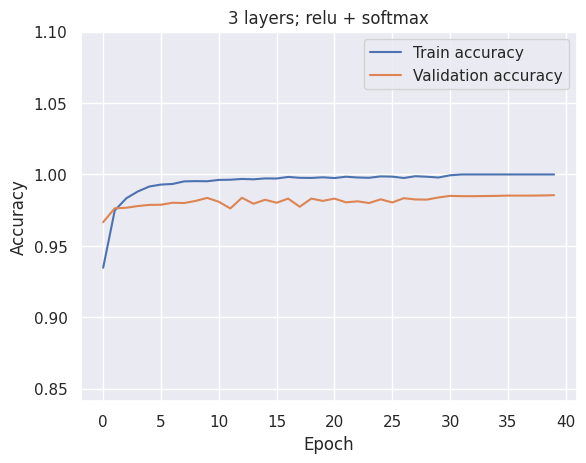

In [173]:
plot_history(first_model_history.history, "3 layers; relu + softmax", "accuracy")

## Second model (2 layers + BN; no softmax)

In [174]:
second_model = tf.keras.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Rescaling(1 / 255),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10),
    ],
    name="mnist-second-model",
)
second_model.summary()

Model: "mnist-second-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 rescaling_1 (Rescaling)     (None, 784)               0         
                                                                 
 batch_normalization_11 (Ba  (None, 784)               3136      
 tchNormalization)                                               
                                                                 
 dense_47 (Dense)            (None, 128)               100480    
                                                                 
 batch_normalization_12 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dense_48 (Dense)            (None, 10)         

In [175]:
second_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [176]:
%%time
second_model_history = second_model.fit(
    train_x, train_y,
    epochs=40,
    batch_size=100,
    validation_data=(test_x, test_y)
)


Epoch 1/40
600/600 [==============================] - 6s 8ms/step - loss: 1.4117 - accuracy: 0.6831 - val_loss: 1.1995 - val_accuracy: 0.6406
Epoch 2/40
600/600 [==============================] - 4s 7ms/step - loss: 1.0980 - accuracy: 0.6686 - val_loss: 1.0470 - val_accuracy: 0.6953
Epoch 3/40
600/600 [==============================] - 6s 9ms/step - loss: 0.9288 - accuracy: 0.7596 - val_loss: 0.8700 - val_accuracy: 0.7788
Epoch 4/40
600/600 [==============================] - 5s 8ms/step - loss: 0.9035 - accuracy: 0.7824 - val_loss: 1.1476 - val_accuracy: 0.7124
Epoch 5/40
600/600 [==============================] - 4s 7ms/step - loss: 0.9205 - accuracy: 0.7572 - val_loss: 0.8066 - val_accuracy: 0.8223
Epoch 6/40
600/600 [==============================] - 6s 10ms/step - loss: 1.0167 - accuracy: 0.7181 - val_loss: 1.0096 - val_accuracy: 0.7304
Epoch 7/40
600/600 [==============================] - 4s 7ms/step - loss: 1.0533 - accuracy: 0.7339 - val_loss: 0.9564 - val_accuracy: 0.7748
Epoch

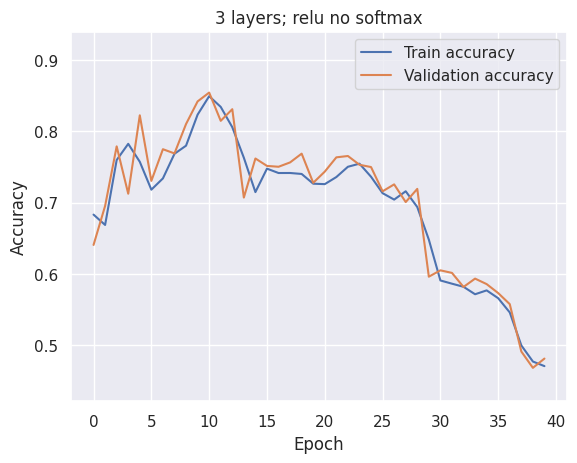

In [177]:
plot_history(second_model_history.history, "3 layers; relu no softmax", "accuracy")

## Third model (3 layers + BN; softmax)

In [178]:
third_model = tf.keras.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Rescaling(1 / 255),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10),
    layers.Softmax()
    ],
    name="mnist-third-model",
)
third_model.summary()

Model: "mnist-third-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 rescaling_2 (Rescaling)     (None, 784)               0         
                                                                 
 dense_49 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_13 (Ba  (None, 512)               2048      
 tchNormalization)                                               
                                                                 
 dense_50 (Dense)            (None, 128)               65664     
                                                                 
 batch_normalization_14 (Ba  (None, 128)               512       
 tchNormalization)                               

In [179]:
third_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [180]:
%%time
third_model_history = third_model.fit(
    train_x, train_y,
    epochs=40,
    batch_size=100,
    validation_data=(test_x, test_y)
)


Epoch 1/40
600/600 [==============================] - 11s 16ms/step - loss: 0.1749 - accuracy: 0.9467 - val_loss: 0.0964 - val_accuracy: 0.9704
Epoch 2/40
600/600 [==============================] - 8s 13ms/step - loss: 0.0724 - accuracy: 0.9773 - val_loss: 0.0846 - val_accuracy: 0.9742
Epoch 3/40
600/600 [==============================] - 9s 15ms/step - loss: 0.0497 - accuracy: 0.9843 - val_loss: 0.0756 - val_accuracy: 0.9757
Epoch 4/40
600/600 [==============================] - 8s 14ms/step - loss: 0.0372 - accuracy: 0.9882 - val_loss: 0.0734 - val_accuracy: 0.9774
Epoch 5/40
600/600 [==============================] - 9s 14ms/step - loss: 0.0322 - accuracy: 0.9894 - val_loss: 0.0725 - val_accuracy: 0.9783
Epoch 6/40
600/600 [==============================] - 10s 16ms/step - loss: 0.0270 - accuracy: 0.9911 - val_loss: 0.0734 - val_accuracy: 0.9768
Epoch 7/40
600/600 [==============================] - 8s 13ms/step - loss: 0.0204 - accuracy: 0.9929 - val_loss: 0.0678 - val_accuracy: 0.98

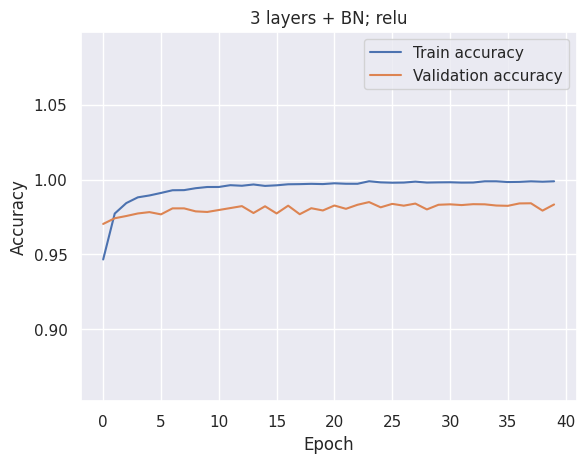

In [181]:
plot_history(third_model_history.history, "3 layers + BN; relu", "accuracy")

# Задание 4

In [182]:
(train_x, train_y), (test_x, test_y) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## First model (3 layers; relu + softmax)

In [183]:
first_model = tf.keras.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Rescaling(1 / 255),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10),
    layers.Softmax()
    ],
    name="fasion-mnist-first-model",
)
first_model.summary()

Model: "fasion-mnist-first-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 rescaling_3 (Rescaling)     (None, 784)               0         
                                                                 
 dense_52 (Dense)            (None, 512)               401920    
                                                                 
 dense_53 (Dense)            (None, 128)               65664     
                                                                 
 dense_54 (Dense)            (None, 10)                1290      
                                                                 
 softmax_2 (Softmax)         (None, 10)                0         
                                                                 
Total params: 468874 (1.79 MB)
Trainable p

In [184]:
first_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [185]:
%%time
first_model_history = first_model.fit(
    train_x, train_y,
    epochs=10,
    batch_size=100,
    validation_data=(test_x, test_y))


Epoch 1/10
600/600 [==============================] - 10s 15ms/step - loss: 0.4809 - accuracy: 0.8293 - val_loss: 0.4154 - val_accuracy: 0.8510
Epoch 2/10
600/600 [==============================] - 7s 12ms/step - loss: 0.3546 - accuracy: 0.8704 - val_loss: 0.3872 - val_accuracy: 0.8566
Epoch 3/10
600/600 [==============================] - 8s 14ms/step - loss: 0.3220 - accuracy: 0.8818 - val_loss: 0.3908 - val_accuracy: 0.8582
Epoch 4/10
600/600 [==============================] - 7s 12ms/step - loss: 0.2976 - accuracy: 0.8897 - val_loss: 0.3433 - val_accuracy: 0.8772
Epoch 5/10
600/600 [==============================] - 9s 15ms/step - loss: 0.2771 - accuracy: 0.8968 - val_loss: 0.3397 - val_accuracy: 0.8786
Epoch 6/10
600/600 [==============================] - 8s 13ms/step - loss: 0.2621 - accuracy: 0.9022 - val_loss: 0.3295 - val_accuracy: 0.8828
Epoch 7/10
600/600 [==============================] - 8s 13ms/step - loss: 0.2533 - accuracy: 0.9053 - val_loss: 0.3300 - val_accuracy: 0.884

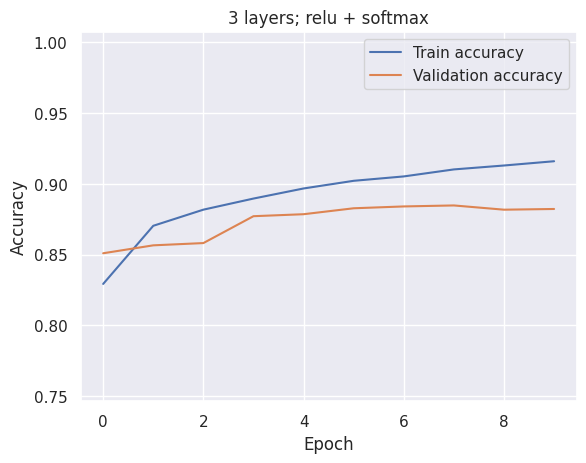

In [186]:
plot_history(first_model_history.history, "3 layers; relu + softmax", "accuracy")

## Second model (2 layers + BN; no softmax)

In [187]:
second_model = tf.keras.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Rescaling(1 / 255),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10),
    ],
    name="fasion-mnist-second-model",
)
second_model.summary()

Model: "fasion-mnist-second-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 rescaling_4 (Rescaling)     (None, 784)               0         
                                                                 
 batch_normalization_15 (Ba  (None, 784)               3136      
 tchNormalization)                                               
                                                                 
 dense_55 (Dense)            (None, 128)               100480    
                                                                 
 batch_normalization_16 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dense_56 (Dense)            (None, 10)  

In [188]:
second_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [189]:
%%time
second_model_history = second_model.fit(
    train_x, train_y,
    epochs=10,
    batch_size=100,
    validation_data=(test_x, test_y)
)


Epoch 1/10
600/600 [==============================] - 6s 7ms/step - loss: 1.1941 - accuracy: 0.6246 - val_loss: 1.0872 - val_accuracy: 0.5878
Epoch 2/10
600/600 [==============================] - 6s 9ms/step - loss: 1.0917 - accuracy: 0.5710 - val_loss: 1.6188 - val_accuracy: 0.4449
Epoch 3/10
600/600 [==============================] - 4s 7ms/step - loss: 1.4819 - accuracy: 0.5199 - val_loss: 1.3452 - val_accuracy: 0.5411
Epoch 4/10
600/600 [==============================] - 4s 7ms/step - loss: 1.5194 - accuracy: 0.5543 - val_loss: 1.8958 - val_accuracy: 0.5685
Epoch 5/10
600/600 [==============================] - 6s 10ms/step - loss: 1.6206 - accuracy: 0.6161 - val_loss: 1.5483 - val_accuracy: 0.6085
Epoch 6/10
600/600 [==============================] - 4s 7ms/step - loss: 1.4951 - accuracy: 0.6088 - val_loss: 1.5771 - val_accuracy: 0.6160
Epoch 7/10
600/600 [==============================] - 4s 7ms/step - loss: 1.6443 - accuracy: 0.6106 - val_loss: 1.4793 - val_accuracy: 0.6360
Epoch

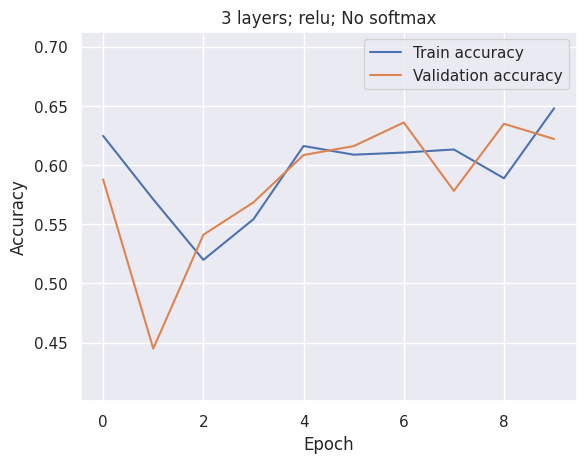

In [190]:
plot_history(second_model_history.history, "3 layers; relu; No softmax", "accuracy")

## Third model (3 layers + BN; softmax)

In [191]:
third_model = tf.keras.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Rescaling(1 / 255),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10),
    layers.Softmax()
    ],
    name="fasion-mnist-third-model",
)
third_model.summary()

Model: "fasion-mnist-third-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 rescaling_5 (Rescaling)     (None, 784)               0         
                                                                 
 dense_57 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_17 (Ba  (None, 512)               2048      
 tchNormalization)                                               
                                                                 
 dense_58 (Dense)            (None, 128)               65664     
                                                                 
 batch_normalization_18 (Ba  (None, 128)               512       
 tchNormalization)                        

In [192]:
third_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [193]:
%%time
third_model_history = third_model.fit(
    train_x, train_y,
    epochs=10,
    batch_size=100,
    validation_data=(test_x, test_y)
)


Epoch 1/10
600/600 [==============================] - 11s 14ms/step - loss: 0.4400 - accuracy: 0.8406 - val_loss: 0.4498 - val_accuracy: 0.8275
Epoch 2/10
600/600 [==============================] - 9s 16ms/step - loss: 0.3505 - accuracy: 0.8711 - val_loss: 0.3808 - val_accuracy: 0.8618
Epoch 3/10
600/600 [==============================] - 8s 13ms/step - loss: 0.3240 - accuracy: 0.8804 - val_loss: 0.4203 - val_accuracy: 0.8555
Epoch 4/10
600/600 [==============================] - 9s 15ms/step - loss: 0.3054 - accuracy: 0.8874 - val_loss: 0.4477 - val_accuracy: 0.8374
Epoch 5/10
600/600 [==============================] - 10s 16ms/step - loss: 0.2916 - accuracy: 0.8918 - val_loss: 0.3573 - val_accuracy: 0.8731
Epoch 6/10
600/600 [==============================] - 8s 13ms/step - loss: 0.2734 - accuracy: 0.8976 - val_loss: 0.3673 - val_accuracy: 0.8642
Epoch 7/10
600/600 [==============================] - 9s 15ms/step - loss: 0.2655 - accuracy: 0.9005 - val_loss: 0.3926 - val_accuracy: 0.86

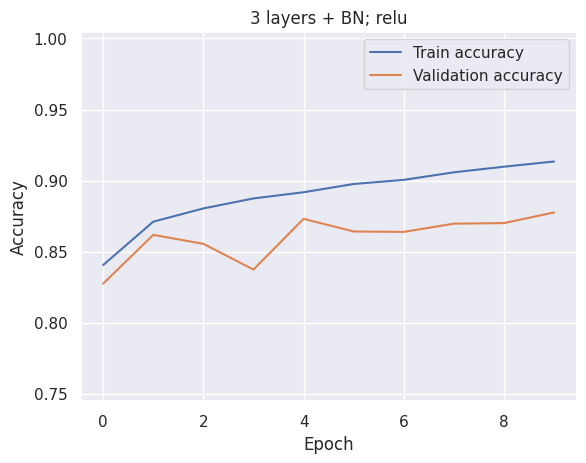

In [194]:
plot_history(third_model_history.history, "3 layers + BN; relu", "accuracy")

# Задание 5

In [195]:
auto_mpg = fetch_ucirepo(id=9)

In [196]:
X = auto_mpg.data.features
y = auto_mpg.data.targets

In [197]:
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [198]:
X = X.fillna(X["horsepower"].mean())

In [199]:
X["origin"] = X["origin"].map({ 1: "USA", 2: "Europe", 3: "Japan" })
X = pd.get_dummies(X, columns=["origin"])


In [200]:
y = y["mpg"]

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [202]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

## First model (2 layers; relu)

In [203]:
normalizer = layers.Normalization()
normalizer.adapt(X_train)

first_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(32, activation='relu'),
    layers.Dense(1),
])
first_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_13 (Normaliz  (None, 9)                 19        
 ation)                                                          
                                                                 
 dense_60 (Dense)            (None, 32)                320       
                                                                 
 dense_61 (Dense)            (None, 1)                 33        
                                                                 
Total params: 372 (1.46 KB)
Trainable params: 353 (1.38 KB)
Non-trainable params: 19 (80.00 Byte)
_________________________________________________________________


In [204]:
# по умолчанию оптимизируемся стохастическим ГС
first_model.compile(loss="mean_squared_error")

In [205]:
first_model_history = first_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200
)


Epoch 1/200
9/9 [==============================] - 1s 36ms/step - loss: 598.2661 - val_loss: 617.6620
Epoch 2/200
9/9 [==============================] - 0s 12ms/step - loss: 585.0754 - val_loss: 606.4908
Epoch 3/200
9/9 [==============================] - 0s 10ms/step - loss: 575.1166 - val_loss: 595.4709
Epoch 4/200
9/9 [==============================] - 0s 11ms/step - loss: 565.2374 - val_loss: 585.0844
Epoch 5/200
9/9 [==============================] - 0s 11ms/step - loss: 555.7161 - val_loss: 574.7579
Epoch 6/200
9/9 [==============================] - 0s 11ms/step - loss: 546.2938 - val_loss: 564.8907
Epoch 7/200
9/9 [==============================] - 0s 11ms/step - loss: 536.9783 - val_loss: 554.3627
Epoch 8/200
9/9 [==============================] - 0s 10ms/step - loss: 527.4473 - val_loss: 544.5667
Epoch 9/200
9/9 [==============================] - 0s 9ms/step - loss: 518.2026 - val_loss: 533.9773
Epoch 10/200
9/9 [==============================] - 0s 11ms/step - loss: 508.6794 -

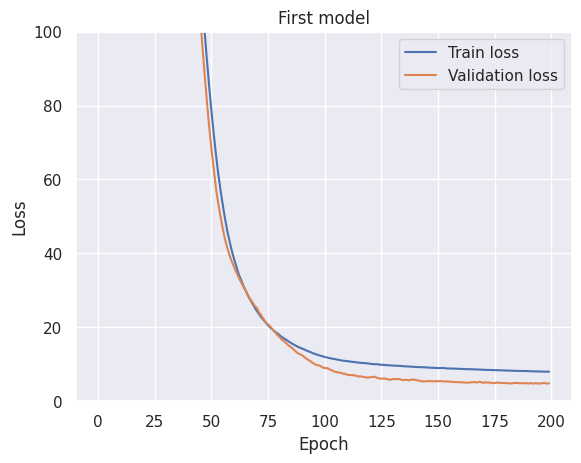

In [206]:
plot_history(first_model_history.history, "First model", ylim=[0, 100])

Mean squared error: 4.851511001586914


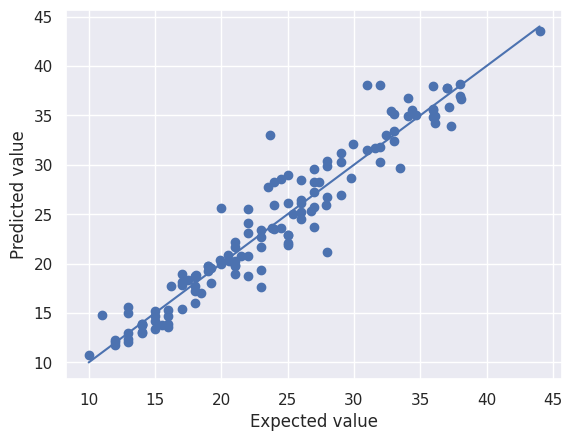

In [207]:
predicted_y = first_model.predict(X_test, verbose=0)
plt.scatter(y_test, predicted_y)
plt.xlabel("Expected value")
plt.ylabel("Predicted value")
lims = [min(*y_test, *predicted_y), max(*y_test, *predicted_y)]
plt.plot(lims, lims)
print("Mean squared error:", first_model_history.history["val_loss"][-1])

## Second model (1 layer)

In [208]:
normalizer = layers.Normalization()
normalizer.adapt(X_train)

second_model = tf.keras.Sequential([
    normalizer,
    # layers.Dense(32, activation='relu'),
    layers.Dense(1),
])
second_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_14 (Normaliz  (None, 9)                 19        
 ation)                                                          
                                                                 
 dense_62 (Dense)            (None, 1)                 10        
                                                                 
Total params: 29 (120.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 19 (80.00 Byte)
_________________________________________________________________


In [209]:
# по умолчанию оптимизируемся стохастическим ГС
second_model.compile(loss="mean_squared_error")

In [210]:
second_model_history = second_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200
)


Epoch 1/200
9/9 [==============================] - 1s 25ms/step - loss: 586.0643 - val_loss: 600.4974
Epoch 2/200
9/9 [==============================] - 0s 7ms/step - loss: 584.8884 - val_loss: 599.4225
Epoch 3/200
9/9 [==============================] - 0s 8ms/step - loss: 584.0179 - val_loss: 598.5135
Epoch 4/200
9/9 [==============================] - 0s 8ms/step - loss: 583.2185 - val_loss: 597.6958
Epoch 5/200
9/9 [==============================] - 0s 6ms/step - loss: 582.4905 - val_loss: 596.7488
Epoch 6/200
9/9 [==============================] - 0s 7ms/step - loss: 581.6781 - val_loss: 595.8891
Epoch 7/200
9/9 [==============================] - 0s 8ms/step - loss: 580.9274 - val_loss: 595.0971
Epoch 8/200
9/9 [==============================] - 0s 9ms/step - loss: 580.2113 - val_loss: 594.1823
Epoch 9/200
9/9 [==============================] - 0s 8ms/step - loss: 579.4279 - val_loss: 593.2502
Epoch 10/200
9/9 [==============================] - 0s 6ms/step - loss: 578.6396 - val_los

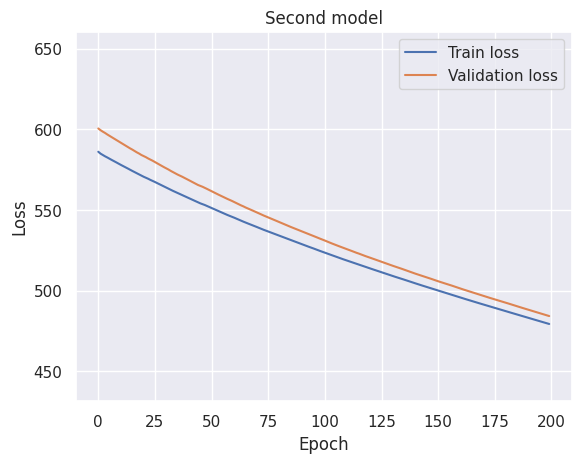

In [211]:
plot_history(second_model_history.history, "Second model")

Mean squared error: 484.16064453125


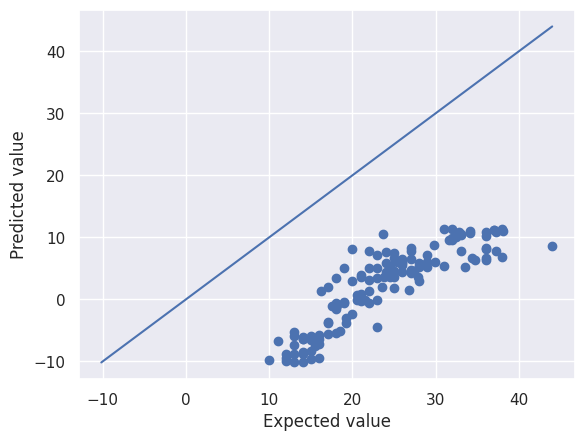

In [212]:
predicted_y = second_model.predict(X_test, verbose=0)
plt.scatter(y_test, predicted_y)
plt.xlabel("Expected value")
plt.ylabel("Predicted value")
lims = [min(*y_test, *predicted_y)[0], max(*y_test, *predicted_y)]
plt.plot(lims, lims)
print("Mean squared error:", second_model_history.history["val_loss"][-1])

# Задание 6

In [213]:
(X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()

In [214]:
print(sum(X_train == np.NAN))
print(sum(X_test == np.NAN))

[0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0]


## First model (2 layers, sigmoid)

In [215]:
normalizer = layers.Normalization()
normalizer.adapt(X_train)

first_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(1),
])
first_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_15 (Normaliz  (None, 13)                27        
 ation)                                                          
                                                                 
 dense_63 (Dense)            (None, 32)                448       
                                                                 
 dense_64 (Dense)            (None, 1)                 33        
                                                                 
Total params: 508 (1.99 KB)
Trainable params: 481 (1.88 KB)
Non-trainable params: 27 (112.00 Byte)
_________________________________________________________________


In [216]:
# по умолчанию оптимизируемся стохастическим ГС
first_model.compile(loss="mean_squared_error")

In [217]:
first_model_history = first_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200
)


Epoch 1/200
13/13 [==============================] - 1s 17ms/step - loss: 597.9022 - val_loss: 618.1019
Epoch 2/200
13/13 [==============================] - 0s 5ms/step - loss: 582.7183 - val_loss: 604.5217
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 570.1539 - val_loss: 591.7808
Epoch 4/200
13/13 [==============================] - 0s 5ms/step - loss: 558.1772 - val_loss: 579.3024
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 546.3377 - val_loss: 566.9926
Epoch 6/200
13/13 [==============================] - 0s 6ms/step - loss: 534.7371 - val_loss: 554.8391
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 523.1577 - val_loss: 542.8588
Epoch 8/200
13/13 [==============================] - 0s 6ms/step - loss: 511.8321 - val_loss: 531.0971
Epoch 9/200
13/13 [==============================] - 0s 6ms/step - loss: 500.7133 - val_loss: 519.5912
Epoch 10/200
13/13 [==============================] - 0s 5ms/step - loss

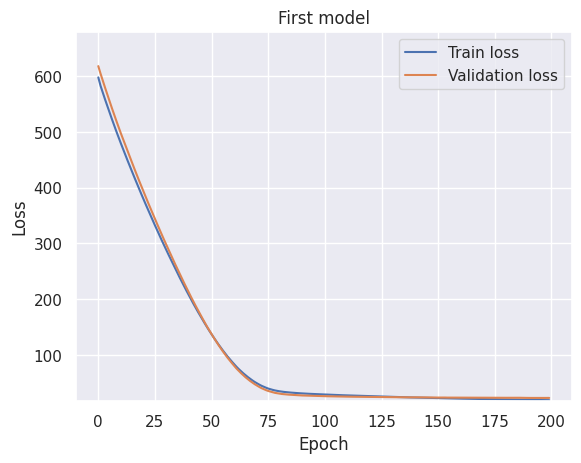

In [218]:
plot_history(first_model_history.history, "First model")

Mean squared error: 23.08523941040039


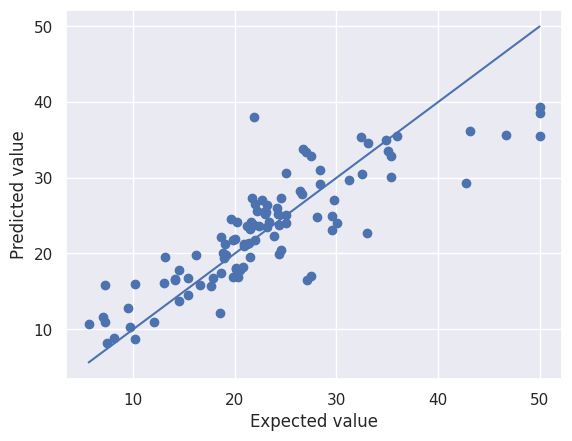

In [219]:
predicted_y = first_model.predict(X_test, verbose=0)
plt.scatter(y_test, predicted_y)
plt.xlabel("Expected value")
plt.ylabel("Predicted value")
lims = [min(*y_test, *predicted_y), max(*y_test, *predicted_y)]
plt.plot(lims, lims)
print("Mean squared error:", first_model_history.history["val_loss"][-1])

## Second model (4 layers; sigmoid)

In [220]:
normalizer = layers.Normalization()
normalizer.adapt(X_train)

second_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(16, activation='sigmoid'),
    layers.Dense(1),
])
second_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_16 (Normaliz  (None, 13)                27        
 ation)                                                          
                                                                 
 dense_65 (Dense)            (None, 64)                896       
                                                                 
 dense_66 (Dense)            (None, 32)                2080      
                                                                 
 dense_67 (Dense)            (None, 16)                528       
                                                                 
 dense_68 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3548 (13.86 KB)
Trainable params: 3521 (13.75 KB)
Non-trainable params: 27 (112.00 Byte)
________________

In [221]:
# по умолчанию оптимизируемся стохастическим ГС
second_model.compile(loss="mean_squared_error")

In [222]:
second_model_history = second_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200
)


Epoch 1/200
13/13 [==============================] - 1s 16ms/step - loss: 563.5732 - val_loss: 575.4388
Epoch 2/200
13/13 [==============================] - 0s 6ms/step - loss: 536.8721 - val_loss: 553.0668
Epoch 3/200
13/13 [==============================] - 0s 5ms/step - loss: 517.4014 - val_loss: 535.1228
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 501.1617 - val_loss: 519.7014
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 487.0782 - val_loss: 506.2280
Epoch 6/200
13/13 [==============================] - 0s 5ms/step - loss: 474.8636 - val_loss: 494.5796
Epoch 7/200
13/13 [==============================] - 0s 5ms/step - loss: 464.2956 - val_loss: 484.5684
Epoch 8/200
13/13 [==============================] - 0s 4ms/step - loss: 455.1783 - val_loss: 475.7901
Epoch 9/200
13/13 [==============================] - 0s 6ms/step - loss: 447.2959 - val_loss: 468.3543
Epoch 10/200
13/13 [==============================] - 0s 5ms/step - loss

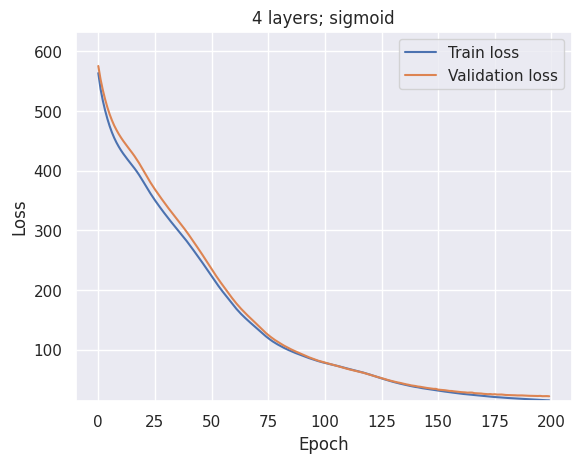

In [223]:
plot_history(second_model_history.history, "4 layers; sigmoid")

Mean squared error: 21.97740936279297


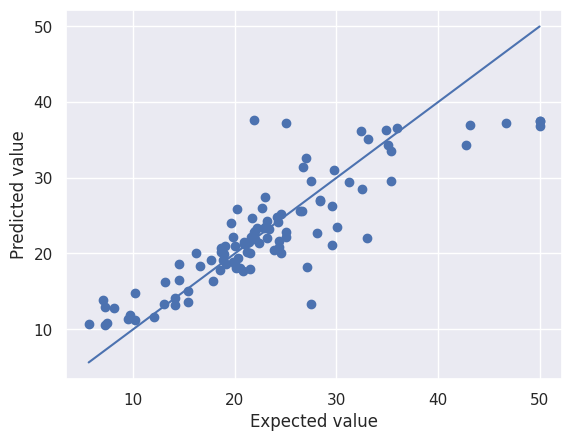

In [224]:
predicted_y = second_model.predict(X_test, verbose=0)
plt.scatter(y_test, predicted_y)
plt.xlabel("Expected value")
plt.ylabel("Predicted value")
lims = [min(*y_test, *predicted_y), max(*y_test, *predicted_y)]
plt.plot(lims, lims)
print("Mean squared error:", second_model_history.history["val_loss"][-1])

## Third model (4 layers + BN; sigmoid)

In [225]:
normalizer = layers.Normalization()
normalizer.adapt(X_train)

third_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(64, activation='sigmoid'),
    layers.BatchNormalization(),
    layers.Dense(32, activation='sigmoid'),
    layers.BatchNormalization(),
    layers.Dense(16, activation='sigmoid'),
    layers.BatchNormalization(),
    layers.Dense(1),
])
third_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_17 (Normaliz  (None, 13)                27        
 ation)                                                          
                                                                 
 dense_69 (Dense)            (None, 64)                896       
                                                                 
 batch_normalization_19 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dense_70 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_20 (Ba  (None, 32)                128       
 tchNormalization)                                               
                                                     

In [226]:
# по умолчанию оптимизируемся стохастическим ГС
third_model.compile(loss="mean_squared_error")

In [227]:
third_model_history = third_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200
)


Epoch 1/200
13/13 [==============================] - 2s 23ms/step - loss: 561.6135 - val_loss: 650.4186
Epoch 2/200
13/13 [==============================] - 0s 6ms/step - loss: 533.4258 - val_loss: 647.6754
Epoch 3/200
13/13 [==============================] - 0s 7ms/step - loss: 520.2350 - val_loss: 646.4327
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 513.2877 - val_loss: 643.8599
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 505.2964 - val_loss: 641.8306
Epoch 6/200
13/13 [==============================] - 0s 5ms/step - loss: 501.3757 - val_loss: 639.5496
Epoch 7/200
13/13 [==============================] - 0s 7ms/step - loss: 491.2253 - val_loss: 639.5735
Epoch 8/200
13/13 [==============================] - 0s 6ms/step - loss: 484.4429 - val_loss: 637.5469
Epoch 9/200
13/13 [==============================] - 0s 7ms/step - loss: 477.8701 - val_loss: 636.3217
Epoch 10/200
13/13 [==============================] - 0s 6ms/step - loss

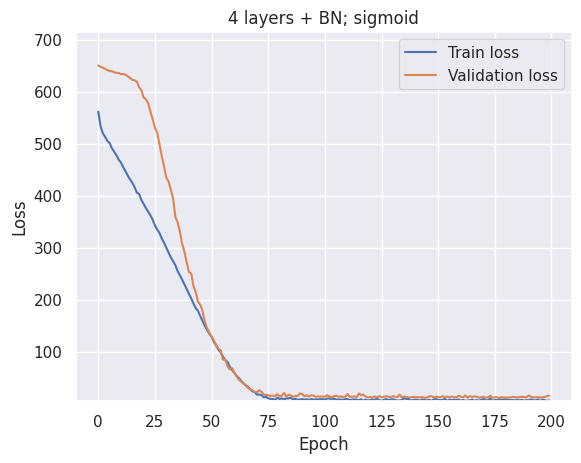

In [228]:
plot_history(third_model_history.history, "4 layers + BN; sigmoid")

In [233]:
min(*y_test, *predicted_y)

5.6

Mean squared error: 15.394775390625


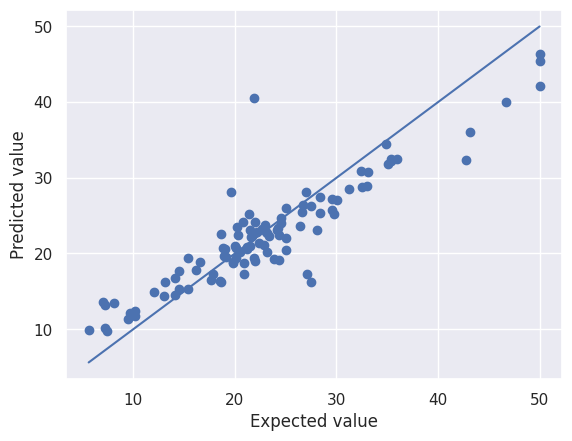

In [234]:
predicted_y = third_model.predict(X_test, verbose=0)
plt.scatter(y_test, predicted_y)
plt.xlabel("Expected value")
plt.ylabel("Predicted value")
lims = [min(*y_test, *predicted_y), max(*y_test, *predicted_y)]
plt.plot(lims, lims)
print("Mean squared error:", third_model_history.history["val_loss"][-1])